## Loading passwords with a function
In the last notebook you learned how to open a text file containing passwords and to read it line by line. You stripped the newline character from each line and you stored the lines in the list of passwords, unless the line was empty. Since you are going to reuse this code many times, it is a perfect candidate to be implemented in a function. The function needs to have one (string) parameter which is the name of the file, and the function should return the preprocessed and filtered list of passwords. You can use the following template for the function:
```python
def load_passwords(path):
    # load the passwords here
    return passwords
```

- Write the function that returns a list of passwords from a text file. You can use the template above or write the function from scratch.
- What happens if you call the function without any argument `load_passwords()`? The error message will tell you exactly what is wrong with the function call.
- Load the passwords from the file `passwords.txt` into a list. How many passwords in the list only contain numeric characters?
- EXTRA: Add a boolean parameter called `load_empty` that allows you to optionally load empty passwords. If you call the function with the argument `load_empty=True`, the empty lines should be included in the list of passwords.

In [1]:
def load_passwords(path):
    # start with an empty list
    passwords = []
    # open the file
    with open(path) as f:
        # iterate over the lines in the file
        for line in f.readlines():
            # remove the newline character
            password = line.strip()
            # append non-empty passwords to the list
            if password:
                passwords.append(password)
    # return the list of passwords
    return passwords

In [2]:
# the error message will state that the required position argument 'path' is missing
load_passwords()

TypeError: load_passwords() missing 1 required positional argument: 'path'

In [3]:
# use the function for the text file with 9000 passwords
passwords = load_passwords("passwords.txt")
len(passwords)

8863

In [4]:
# regular for-loop to get the numeric passwords
numeric_passwords = []
for password in passwords:
    if password.isnumeric():
        numeric_passwords.append(password)
len(numeric_passwords)

1263

In [5]:
# list comprehension to get the numeric passwords
numeric_passwords = [password for password in passwords if password.isnumeric()]
len(numeric_passwords)

1263

In [6]:
# add a second parameter 'load_empty'
def load_passwords_improved(path, load_empty):
    passwords = []
    with open(path) as f:
        for line in f.readlines():
            password = line.strip()
            # append the password if it is True or the parameter 'load_empty' is True
            if password or load_empty:
                passwords.append(password)
    return passwords

In [7]:
# the list of all passwords will have a length of 9000
all_passwords = load_passwords_improved("passwords.txt", True)
len(all_passwords)

9000

## Normalized length distribution
Instead of the function `np.bincount()`, you can also use the function `np.unique()` to get the length distribution. As the name suggests, the primary usage of the function `np.unique()` is to get the unique values from an array. If you have an array called `lengths`, the function `np.unique(lengths)` will return the unique values in the array `lengths` in ascending order. 
```python
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths = np.unique(lengths)
```
However, if you call the function with the additional argument `return_counts=True`, you will receive two arrays. The first array will contain the unique values and the second array will return the corresponding counts:
```python
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)
```
Compared to using `np.bincount()`, the function `np.unique()` can directly give you the x-values and the y-data for the length distribution plot, and you do not have to remove the leading zeros manually.

- Reproduce the two examples in the exercise with the predefined array `lengths`.
- Create a new array with at least ten integer values in the interval [0, 5]. Write down the unique values and counts that you expect on paper, and then use the function `np.unique()` to see if you were right.
- Compute the array of lengths for the list of passwords that you loaded in the previous exercise. Use the function `np.unique()` to get the unique lengths and their counts.
- Normalize the array of the length counts and store the result in a new array. If the new array is normalized correctly, the sum of the array will be `1.0`.
- Create a bar plot with the normalized length distribution. Label the axes, add a title (that includes the number of passwords) and change any other property to improve the plot.

In [8]:
# import the packages numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# the unique lengths will be sorted in ascending order
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths = np.unique(lengths)
unique_lengths

array([1, 2, 4])

In [10]:
# the counts are "aligned" with the unique lengths
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)
unique_lengths, length_counts

(array([1, 2, 4]), array([3, 1, 1]))

In [11]:
# create your own array with length data from 0 to 5
lengths = np.array([0, 1, 1, 1, 5, 3, 2, 1, 2, 5, 3, 2, 1])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)
unique_lengths, length_counts

(array([0, 1, 2, 3, 5]), array([1, 5, 3, 2, 2]))

In [12]:
# compute the lengths of the password dataset
lengths = np.array([len(password) for password in passwords])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)

In [13]:
# the sum of length_counts is the same as len(passwords) or len(lengths)
normalized_length_counts = length_counts / np.sum(length_counts)

Text(0.5, 1.0, 'Normalized length distribution of 8863 passwords')

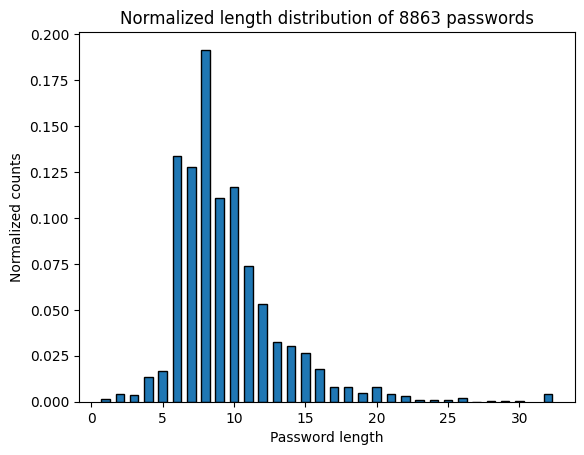

In [14]:
# reduce the bar width a bit since the bars are almost "touching" with the default width
plt.bar(unique_lengths, normalized_length_counts, width=0.6, edgecolor="k")
plt.xlabel("Password length")
plt.ylabel("Normalized counts")
plt.title(f"Normalized length distribution of {len(passwords)} passwords")

## Counting duplicate passwords
With an increasing number of passwords, there will also be an increasing number of duplicate passwords. (Actually, there were already a few duplicates in the first 100 passwords. Did you notice any of them?) Getting the unique passwords and their counts should therefore be the first step of the data analysis. This will allow you to get a much better overview of your data without removing any information. Even though the list of passwords is not numerical data, you can still use the function `np.unique()` that was introduced in the previous exercise.

- Get the unique passwords and their counts with the function `np.unique()`. How are the unique passwords ordered? If the start of the array is too confusing, look at the last 50 **unique** passwords instead.
- Compare the number of **unique** passwords to the number of **all** passwords. How many passwords in the initial dataset were duplicates? What is the maximum number of duplicates of a password?
- Use NumPy array filtering to get the passwords with a count greater than 10 (greater than 2 if you are using the smaller dataset). If you are using one of these passwords yourself, you should probably consider changing it. :)
- Compute the length of each **unique** password and store the result in a new array. How can you calculate the average length of **all** passwords from the unique arrays?
- Plot the counts as a function of the lengths, label the axes and add a title. You can either use the function `plt.scatter()` or you can use `plt.plot()` with a format that only display markers.
- Create a second plot and highlight the data points where the count is greater than 10 (greater than 2 if you are using the smaller dataset). You can either use a different color or increase the size of the points. Hint: Call the plot function twice and use NumPy array filtering to select the data. Add labels to the axes, assign labels to the data and add a legend.

In [15]:
# use the function np.unique() with the parameter return_counts=True to get the unique passwords and their counts
unique_passwords, password_counts = np.unique(passwords, return_counts=True)
unique_passwords, password_counts

(array(['!!!voruch', '!@#$%^star', '&#33;@#&#036;%^QWERTY', ...,
        'zzxxaass', 'zzxxcc', 'zzzzzzz'], dtype='<U32'),
 array([2, 1, 1, ..., 1, 1, 1]))

In [16]:
# the passwords are ordered alphabetically, if the first character is equal, they are ordered by the second character etc...
unique_passwords[-50:]

array(['zeHzwPuz6a', 'zefjo111', 'zehzwpuz6a', 'zenghui2', 'zenit-talnah',
       'zenit2009', 'zet1108', 'zevs_ev', 'zewapido', 'zezina80',
       'zezoxuba', 'zgd-', 'zgd-11', 'zink2008', 'zink2009', 'zitipemy',
       'zivosely', 'zjxtymnt', 'zjxtymnt,zk.,k.', 'zk.:', 'zllf',
       'zobokewa', 'zohegina', 'zolotarev08', 'zoloto12', 'zone12',
       'zorro2009', 'zoxalyjy', 'zsp9527412', 'zuewamarija', 'zujerujy',
       'zukizuki', 'zum-zum.ru', 'zupusyqe', 'zv0n04ek', 'zvezdopad',
       'zx11081991xz', 'zxcv123', 'zxcvbnm', 'zxcvbnm:', 'zxdf1324',
       'zyaqhlmw', 'zyhozazy', 'zyjibysi', 'zyx123456', 'zzgtbz',
       'zztop1', 'zzxxaass', 'zzxxcc', 'zzzzzzz'], dtype='<U32')

In [17]:
# special characters also have an "alphabetic value", e.g. "!" < "&"  etc...
unique_passwords[:50]

array(['!!!voruch', '!@#$%^star', '&#33;@#&#036;%^QWERTY',
       '&#33;tktyf&#33;', '(pomo4ka)', '(pomo4ka</', '**', '*******',
       '**********', '*rhfcfdbwf*', ',ehrjdcrfzvfhbzktjybljdyf', '--',
       '-- zanoza', '-1111199', '-11111999', '-111999', '-331279',
       '-4121113', '-djuz', '.', '.1234.', '.KF2440491', '.MORE.',
       '.andrei', '.hxtr1981', '.kbxrf', '.kbz1177', '.princessl',
       '000---11', '00000', '000000', '00000000', '000000000', '000459',
       '000666', '0009124560', '000aaaq', '000rtye', '001110', '00174520',
       '002002002', '003145', '01.07.2002', '010101', '01011978',
       '01012011', '01021985', '0102198501021985', '01041994', '010564m'],
      dtype='<U32')

In [18]:
# compare the length of the initial password list to the shape of the unique passwords
len(passwords), unique_passwords.shape

(8863, (5707,))

In [19]:
# their difference will be the number of duplicate passwords
len(passwords) - unique_passwords.shape[0]

3156

In [20]:
# get the highest value from the counts array
np.max(password_counts)

71

In [21]:
# use the condition password_counts > 10 to get the boolean array and use it as an index of the unique passwords
unique_passwords[password_counts > 10]

array(['11', '111111', '123123', '123456', '1234567', '123456789',
       'passer2009', 'passer2010', 'q492578', 'qwerty', 'ronaldo'],
      dtype='<U32')

In [22]:
# get the array of lengths from the unique passwords
lengths = np.array([len(password) for password in unique_passwords])
lengths

array([ 9, 10, 21, ...,  8,  6,  7])

In [23]:
# option 1: sum over the product of the lengths and the counts and divide by the number of all passwords
np.sum(lengths * password_counts) / len(passwords)

9.499605099853323

In [24]:
# option 2: sum over the product of the lengths and the counts and divide by the sum of the counts
np.sum(lengths * password_counts) / np.sum(password_counts)

9.499605099853323

In [25]:
# option 3: use the function np.average() with the password_counts as the weights
np.average(lengths, weights=password_counts)

9.499605099853323

Text(0.5, 1.0, 'Duplicate counts of 8863 passwords')

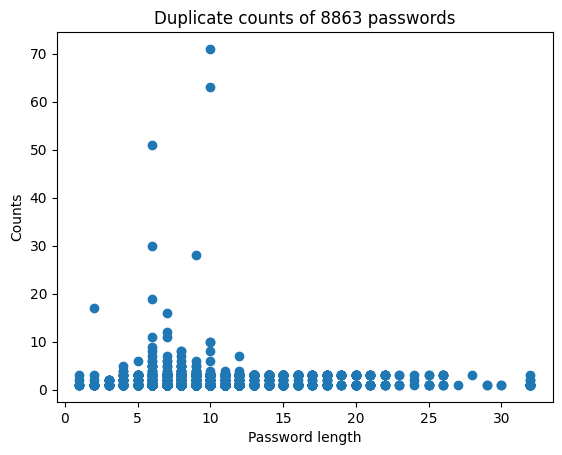

In [26]:
# display the counts as a function of the length with a scatter plot
plt.scatter(lengths, password_counts)
plt.xlabel("Password length")
plt.ylabel("Counts")
plt.title(f"Duplicate counts of {len(passwords)} passwords")

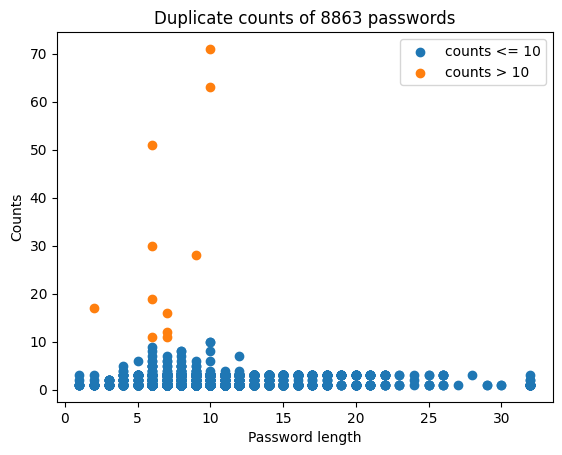

In [27]:
# separate the data with the condition counts > 10 and call the scatter plot twice
plt.scatter(lengths[password_counts <= 10], password_counts[password_counts <= 10], label="counts <= 10")
plt.scatter(lengths[password_counts > 10], password_counts[password_counts > 10], label="counts > 10")
plt.xlabel("Password length")
plt.ylabel("Counts")
plt.title(f"Duplicate counts of {len(passwords)} passwords")
plt.legend()

## Sorting the passwords
The current order of the unique passwords is somewhat unfortunate to further analyze the data, since there are just some weird passwords beginning with special characters at the start of the array of **unique** passwords. Sorting the arrays by the counts in descending order would make a lot more sense, the most recurring passwords would then come first in the arrays. If you just want to sort the array of counts, you can directly do that with the function `np.sort()`. By default the counts will be sorted in ascending order but you can reverse the array with the indexing `[::-1]`. See the following code snippet to sort an array in descending order:
```python
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
np.sort(some_numbers)[::-1]
```
The problem here is that you will only sort the counts but not the unique passwords and their lengths. Instead of directly sorting the counts, you should therefore use the function `np.argsort()` that will return the indices to sort the counts. See the following code snippet that will have the same result as the example above:
```python
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
sorted_indices = np.argsort(some_numbers)[::-1]
some_numbers[sorted_indices]
```
You can then use the array `sorted_indices` to sort the **unique** passwords, the counts and the lengths.

- Reproduce the two examples in the exercise with the predefined array `some_numbers`.
- Create a new array with at least seven integer values. Write down the results you expect from the functions `np.sort()` and `np.argsort()` on paper, and then execute the functions to see if you were right. You can choose whether you want to sort the array in ascending order or in descending order.
- Use the function `np.argsort()` and the reverse index to get the indices that will sort the counts in descending order.
- Create three new arrays for the **unique** passwords, the counts and the lengths by applying the sorted indices to the respective arrays.
- Look at the first ten passwords and their counts in the sorted arrays. Which passwords did you expect to be in the "top ten"?

In [28]:
# directly sort the numbers in descending order
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
np.sort(some_numbers)[::-1]

array([9, 6, 5, 4, 3, 2, 1, 1])

In [29]:
# use the sorted indices to sort the numbers in descending order
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
sorted_indices = np.argsort(some_numbers)[::-1]
sorted_indices, some_numbers[sorted_indices]

(array([5, 7, 4, 2, 0, 6, 3, 1]), array([9, 6, 5, 4, 3, 2, 1, 1]))

In [30]:
# directly sort the numbers in ascending order 
more_numbers = np.array([8, 3, 1, 4, 4, 6, 2])
np.sort(more_numbers)

array([1, 2, 3, 4, 4, 6, 8])

In [31]:
# use the sorted indices to sort the numbers in ascending order
more_numbers = np.array([8, 3, 1, 4, 4, 6, 2])
sorted_indices = np.argsort(more_numbers)
sorted_indices, more_numbers[sorted_indices]

(array([2, 6, 1, 3, 4, 5, 0]), array([1, 2, 3, 4, 4, 6, 8]))

In [32]:
# use the function np.argsort() on the counts and reverse the array to get the descending order
sorted_indices = np.argsort(password_counts)[::-1]

In [33]:
# use the sorted indices on all three arrays to apply the sort
sorted_passwords = unique_passwords[sorted_indices]
sorted_counts = password_counts[sorted_indices]
sorted_lengths = lengths[sorted_indices]

In [34]:
# the first two passwords and "ronaldo" are rather surprising, they are probably only in the "top ten" due to the small sample size
# the other passwords are reasonable candidates for the most regular passwords
sorted_passwords[:10]

array(['passer2010', 'passer2009', '123456', '111111', '123456789',
       'qwerty', '11', '1234567', 'ronaldo', '123123'], dtype='<U32')

## Keeping arrays in a data frame
The sorting process of the three arrays in the previous section showed you that it is not very convenient to manage multiple NumPy arrays manually. In principle, you could stack the three arrays from the previous exercise to create a two-dimensional NumPy array. The data would then remain aligned if you change the order in any way. However, since one of the arrays stores string data and the other two arrays store integer data, this data is not suitable to be combined in a single array.  

The package [pandas](https://pandas.pydata.org/) (imported as `pd` by convention) resolves this issue with a so-called data frame that works very similar to a spreadsheet (from Excel or LibreOffice Calc). A data frame has an index (as an identifier of the rows) and columns to store the data. Each column in the data frame works just like a NumPy array, but the columns are not required to all have the same type. A data frame is therefore suited to store mixed data, such as your passwords, the counts and the lengths. See the following code snippet to create a data frame from the (unsorted) arrays:
```python
import pandas as pd
df = pd.DataFrame(dict(password=unique_passwords, count=password_counts, length=lengths))
```
The variable name `df` is often used for data frames but you can use any other variable name here. The keys in the dictionary will be the names of the columns and the values are the column data. By default, the index goes from `0` to the `len(unique_passwords) - 1`, just like `range(len(unique_passwords))` or `np.arange(len(unique_passwords))`.  

You can directly create a plot from the data frame using the method `df.plot(x, y)`. The method only needs the names of the columns and the data is then taken from the data frame. See the following code snippet to plot the counts as a function of the length:
```python
df.plot("length", "count")
```

- Import the package `pandas` and rename it to `pd`. Create the data frame with the code snippet above and look at the output of the data frame.
- How can you change the column names when creating the data frame? You do not have to find better names for the columns, just try any other names to understand how the renaming works.
- Use the data frame method `df.plot()` to display the counts as a function of the length. Look at the docstring of the method to find out which parameter you have to change to get a scatter plot. How can you change the marker and the color?

In [35]:
# import the pandas package
import pandas as pd

In [36]:
# create the data frame
df = pd.DataFrame(dict(password=unique_passwords, count=password_counts, length=lengths))

In [37]:
df

,password,count,length
0,!!!voruch,2,9
1,!@#$%^star,1,10
2,&#33;@#&#036;%^QWERTY,1,21
3,&#33;tktyf&#33;,1,15
4,(pomo4ka),1,9
...,...,...,...
5702,zzgtbz,1,6
5703,zztop1,1,6
5704,zzxxaass,1,8
5705,zzxxcc,1,6


In [38]:
# rename the columns by changing the keys of the dictionary
pd.DataFrame(data=dict(passwords=unique_passwords, counts=password_counts, lengths=lengths))

,passwords,counts,lengths
0,!!!voruch,2,9
1,!@#$%^star,1,10
2,&#33;@#&#036;%^QWERTY,1,21
3,&#33;tktyf&#33;,1,15
4,(pomo4ka),1,9
...,...,...,...
5702,zzgtbz,1,6
5703,zztop1,1,6
5704,zzxxaass,1,8
5705,zzxxcc,1,6


<Axes: xlabel='length', ylabel='count'>

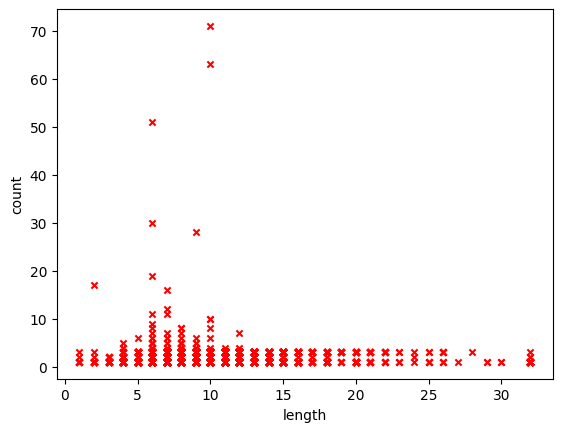

In [39]:
# use the argument kind="scatter" to change the type of the plot and use a different marker and color
df.plot("length", "count", kind="scatter", marker="x", color="r")